# Workshop: Desbravando Dados Geográficos com Python, GeoPandas e Folium

### Resumo

* Nesse workshop, realizaremos um estudo de caso com dados abertos para entendermos conceitos básicos e aspectos técnicos do trabalho com dados geográficos. 

* Discutiremos a respeito dos tipos de dados geográficos e como podemos agregá-los para extrair informações de interesse. 

* Utilizaremos a linguagem de programação Python e bibliotecas como GeoPandas e Folium durante o workshop, fazendo uma dinâmica entre teoria e prática.

### Tópicos abordados

1. O que são dados geográficos? 
2. Tipos de dados geográficos
3. Mapas estáticos x Mapas dinâmicos
4. Caixa de ferramentas
5. Camadas de dados
6. Operações com dados geográficos
7. Sistemas de coordenadas geográficas
8. Particularidades dos dados geográficos
9. Formatos de arquivos para trabalhar com dados vetorizados
10. Estudo de caso: análise de acidentes em rodivias brasileiras

## 1) Introdução

* O trabalho com dados geográficos é multidisciplinar.


* Nos dias atuais, ao trabalhar com esses dados, utilizamos fontes de dados emergentes em conjunto com técnicas computacionais e estatísticas para trabalhar com representações geográfica do mundo real.


* Dentre os dados geográficos que podemos encontrar, temos:
    * Administrativos;
    * Socioeconômicos;
    * Transporte e mobilidade;
    * Ambientais;
    * Hidrográficos;
    * Infraestrutura;
    * Saúde;
    * Redes Sociais;
    * Transações bancárias;
    * Atividades físicas;
    * Prestação de serviços.
    

* A evolução da tecnologia, aumento da conectividade e os dispositivos pessoais com GPS e sensores
    * Isso tende a evoluir ainda mais com o surgimento de novas áreas (exemplo: Internet das Coisas e Computação Urbana).
    

* Os dados geográficos podem aprimorar produtos e serviços por meio de informações detalhadas e contextualizadas.


### 1.1) O que são dados geográficos?

* Dados geográficos são caracterizados pela agregação de uma **localização** com uma **informação ou atributo**.


![](https://i.imgur.com/6Gj296s.png)


### 1.2) Tipos de dados geográficos

* Existem dois tipos de dados geográficos que podem representar o mundo real: vetorial e *raster*.

#### Dados vetoriais

* São dados discretos e representados por **geometrias**, como:
    * Pontos;
    * Linhas;
    * Polígonos;
   
   
* Um determinado objeto do mundo real pode ser representado por uma única geometria ou múltiplas.


* Exemplos: 
    * Pontos de interesse;
    * Linhas de metrô, ruas e ciclovias;
    * Bairros e municípios.


![](https://carto.com/blog/img/posts/2020/2020-08-12-raster-vs-vector-whats-the-difference-which-is-best/vector-data.jpg)


Fonte: [carto.com](https://carto.com/blog/raster-vs-vector-whats-the-difference-which-is-best/)


#### Dados *raster*

* Também são conhecidos como dados de **malha** e podem conter dados contínuos ou discretos.


* Esses dados são matrizes de *pixels*, sendo que cada *pixel* contém informações relacionadas ao objeto do mundo real que representam.


* Exemplos:
    * Imagens de satélite;
    * Tipo de solo;
    * Elevações;
    * Poluição;
    * Temperatura.


![](https://carto.com/blog/img/posts/2020/2020-08-12-raster-vs-vector-whats-the-difference-which-is-best/raster-data.jpg)


Fonte: [carto.com](https://carto.com/blog/raster-vs-vector-whats-the-difference-which-is-best/)


### 1.3) Mapas estáticos x Mapas dinâmicos

* Mapas estáticos podem ser analógicos ou digitais.

* Mapas dinâmicos são interativos.

## 2) Configurações iniciais do nosso projeto

* Shapely
* GeoPandas
* Contextily
* Folium

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point
import geopandas as gpd
import contextily
import folium

import os
from urllib.request import urlretrieve
import zipfile

In [ ]:
pd.options.display.max_columns = None

In [ ]:
sns.set(font_scale=1.4)
sns.set_style({'font.family': 'serif',
               'fontname': 'Times New Roman'})

In [ ]:
mpl.rcParams['figure.dpi'] = 100

## 3) Dados geográficos e suas camadas

* Quando trabalhamos com dados geográficos, é comum utilizamos múltiplas fontes de dados.


* Cada fonte de dado é representada por uma camada.


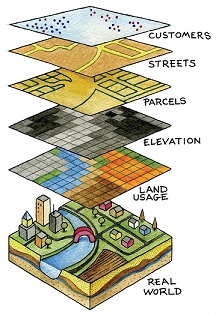

Fonte: [dadascience.design](https://dadascience.design/talks/BerlinRTidyGIS/BerlinR_GIS_talk.html#31)


* Novas camadas podem ser criadas a partir de operações espaciais quem relacionam dados de duas ou mais camadas. Dentre as operações mais conhecidas, temos:
    * Contém / Dentro de;
    * União;
    * Interseção.


## 4) Sistemas de coordenadas geográficas

* A Terra possui formato de elipse. 


* Para localizar posições no globo, utilizamos latitude e longitude.


![](https://www.estadosecapitaisdobrasil.com/wp-content/uploads/2016/06/latitude-e-longitude.jpg?x65722)


Fonte: [estadosecapitaisdobrasil.com](https://www.estadosecapitaisdobrasil.com/wp-content/uploads/2016/06/latitude-e-longitude.jpg?x65722)


* Sistemas de coordenadas que veremos neste workshop:
    * EPSG: 4674
    * EPSG: 3857


## 5) Particularidades dos dados geográficos

* Alterações de escala e zoneamento podem modificar análises e resultados.


* É preferível utilizarmos estruturas de dados e bancos de dados espaciais, devido a fatores como as operações espaciais.


* Todas as camadas de dados devem utilizar o mesmo Sistema de Coordenadas Geográficas.


* Existem correlações espaciais entre fenômenos observados.


* Devemos observar correlação e a causalidade.


## 6) Formatos de arquivos para trabalhar com dados vetorizados

* Shapefile
* GeoJSON
* GeoPackage

## 7) Camadas de dados do nosso projeto

### 7.1) Unidades Federativas

* Fonte: [Instituto Brasileiro de Geografia e Estatística (IBGE)](https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html?=&t=downloads)

In [ ]:
if not os.path.exists('/kaggle/working/unidades_federativas'):
    os.makedirs('/kaggle/working/unidades_federativas')

In [ ]:
url_unidades_federativas = 'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2020/Brasil/BR/BR_UF_2020.zip'

In [ ]:
%%time

urlretrieve(url_unidades_federativas, '/kaggle/working/unidades_federativas/BR_UF_2020.zip')

In [ ]:
with zipfile.ZipFile('/kaggle/working/unidades_federativas/BR_UF_2020.zip', 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working/unidades_federativas/')

In [ ]:
os.remove('/kaggle/working/unidades_federativas/BR_UF_2020.zip')

In [ ]:
ufs_gdf = gpd.read_file('/kaggle/working/unidades_federativas/BR_UF_2020.shp')

In [ ]:
ufs_gdf.shape

In [ ]:
ufs_gdf.head()

In [ ]:
ufs_gdf.iloc[0].geometry

In [ ]:
ufs_gdf.crs.to_string()

In [ ]:
ufs_gdf = ufs_gdf.to_crs(crs='EPSG:3857')

In [ ]:
ufs_gdf.crs.to_string()

In [ ]:
ufs_gdf.head()

In [ ]:
ax = ufs_gdf.plot(figsize=(15, 10), edgecolor='black', facecolor='none')
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

### 7.2) Acidentes de trânsito em rodovias brasileiras

* Fonte: [Polícia Rodoviária Federal](https://portal.prf.gov.br/dados-abertos-acidentes)

In [ ]:
datatran_2017_df = pd.read_csv('../input/brazil-highway-traffic-accidents/por_ocorrencias/datatran2017.csv', 
                               sep = ';',
                               encoding = 'latin-1')

datatran_2018_df = pd.read_csv('../input/brazil-highway-traffic-accidents/por_ocorrencias/datatran2018.csv', 
                               sep = ';',
                               encoding = 'latin-1')

datatran_2019_df = pd.read_csv('../input/brazil-highway-traffic-accidents/por_ocorrencias/datatran2019.csv', 
                               sep = ';',
                               encoding = 'latin-1')

datatran_2020_df = pd.read_csv('../input/brazil-highway-traffic-accidents/por_ocorrencias/datatran2020.csv', 
                               sep = ';',
                               encoding = 'latin-1')

In [ ]:
datatran_df = pd.concat([datatran_2017_df, 
                         datatran_2018_df, 
                         datatran_2019_df, 
                         datatran_2020_df])

In [ ]:
datatran_df.head()

In [ ]:
datatran_df.shape

In [ ]:
type(datatran_df)

In [ ]:
datatran_df.dtypes

In [ ]:
colunas = ['latitude', 'longitude', 'km']

In [ ]:
for col in colunas: 
    datatran_df[col] = datatran_df[col].astype(str).str.replace(',','.').astype(float)
    datatran_df[col] = datatran_df[col].astype(float)

In [ ]:
geometry = [Point(xy) for xy in zip(datatran_df['longitude'], 
                                    datatran_df['latitude'])]

In [ ]:
datatran_df = gpd.GeoDataFrame(datatran_df, crs='EPSG:4326', geometry=geometry)

In [ ]:
datatran_df.head()

In [ ]:
datatran_df.shape

In [ ]:
type(datatran_df)

In [ ]:
datatran_df = datatran_df.to_crs(crs='EPSG:3857')

In [ ]:
datatran_df.crs.to_string()

In [ ]:
datatran_df.head()

In [ ]:
ax = datatran_df.plot(figsize=(15, 10), markersize=1, color='blue')
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

In [ ]:
datatran_df = gpd.sjoin(datatran_df, ufs_gdf, op='within')

In [ ]:
datatran_df.head()

In [ ]:
ax = datatran_df.plot(figsize=(17, 20), markersize=1, column='uf', legend=True)
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

In [ ]:
plt.figure(figsize = (15,5))

ax = sns.countplot(x = 'uf', 
                   data = datatran_df, 
                   order = datatran_df['uf'].value_counts().index)

ax.set_title('Unidades Federativas com as maiores ocorrências de acidentes')
ax.set_xlabel('UF')
ax.set_ylabel('Qtd. de ocorrências')

plt.show()

In [ ]:
plt.figure(figsize = (15,5))

ax = sns.countplot(x = 'NM_REGIAO', 
                   data = datatran_df, 
                   order = datatran_df['NM_REGIAO'].value_counts().index)

ax.set_title('Regiões com as maiores ocorrências de acidentes')
ax.set_xlabel('Região')
ax.set_ylabel('Qtd. de ocorrências')

plt.show()

In [ ]:
plt.figure(figsize = (15,5))

ax = sns.countplot(x = 'dia_semana', 
                   data = datatran_df, 
                   order = datatran_df['dia_semana'].value_counts().index)

ax.set_title('Dias da semana com as maiores ocorrências de acidentes')
ax.set_xlabel('Dia da semana')
ax.set_ylabel('Qtd. de ocorrências')

plt.show()

In [ ]:
for tipo_acidente in datatran_df['tipo_acidente'].unique():
    print(tipo_acidente)

In [ ]:
plt.figure(figsize = (25,5))

ax = sns.countplot(x = 'tipo_acidente', 
                   data = datatran_df, 
                   order = datatran_df['tipo_acidente'].value_counts().index)

labels = [item.get_text().replace(' ', '\n') for item in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation = 90)

ax.set_title('Tipos de acidentes de trânsito')
ax.set_xlabel('Tipo de acidente')
ax.set_ylabel('Qtd. de ocorrências')

plt.show()

In [ ]:
for causa_acidente in datatran_df['causa_acidente'].unique():
    print(causa_acidente)

In [ ]:
plt.figure(figsize = (60,5))

ax = sns.countplot(x = 'causa_acidente', 
                   data = datatran_df, 
                   order = datatran_df['causa_acidente'].value_counts().index)

labels = [item.get_text().replace(' ', '\n') for item in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation = 90)

ax.set_title('Causas de acidentes de trânsito')
ax.set_xlabel('Causa do acidente')
ax.set_ylabel('Qtd. de ocorrências')

plt.show()

In [ ]:
for fase_dia in datatran_df['fase_dia'].unique():
    print(fase_dia)

In [ ]:
for condicao_metereologica in datatran_df['condicao_metereologica'].unique():
    print(condicao_metereologica)

In [ ]:
for classificacao_acidente in datatran_df['classificacao_acidente'].unique():
    print(classificacao_acidente)

In [ ]:
plt.figure(figsize = (10,20))

ax = sns.catplot(x = 'classificacao_acidente', 
                 hue = 'condicao_metereologica', 
                 col = 'fase_dia',
                 data = datatran_df, 
                 kind = 'count',
                 height = 7,
                 col_wrap = 2, 
                 sharex = False, 
                 sharey = False, 
                 legend_out=False)

plt.tight_layout()
plt.show()

In [ ]:
for uso_solo in datatran_df['uso_solo'].unique():
    print(uso_solo)

In [ ]:
plt.figure(figsize = (6,3))

ax = sns.countplot(x = 'uso_solo', 
                   data = datatran_df, 
                   order = datatran_df['uso_solo'].value_counts().index)

ax.set_title('Uso do solo')
ax.set_xlabel('Uso do solo (urbano)')
ax.set_ylabel('Qtd. de ocorrências')

plt.show()

## 8) Trabalhando com mapas dinâmicos

### 8.1) Conhecendo mapas coropléticos

In [ ]:
datatran_df.head()

In [ ]:
acidentes_uf = datatran_df.groupby(by='SIGLA_UF').size()
acidentes_uf = acidentes_uf.sort_values(ascending=False)
acidentes_uf

In [ ]:
acidentes_uf = acidentes_uf.to_frame()
acidentes_uf

In [ ]:
acidentes_uf = acidentes_uf.reset_index()
acidentes_uf.columns = ['SIGLA_UF', 'qtd_acidentes']
acidentes_uf

In [ ]:
acidentes_uf = pd.merge(ufs_gdf, acidentes_uf, on='SIGLA_UF')
acidentes_uf

In [ ]:
coord_centro_brasil = [-14.235004, -51.925282]
mapa_acidentes = folium.Map(location=coord_centro_brasil, zoom_start=5)

In [ ]:
folium.Choropleth(geo_data = acidentes_uf,
                  name = 'UF',
                  data = acidentes_uf,
                  columns = ['SIGLA_UF', 'qtd_acidentes'],
                  key_on = 'feature.properties.SIGLA_UF',
                  fill_color = 'Spectral',
                  fill_opacity = 0.75,
                  line_opacity = 0.75,
                  legend_name = 'Quantidade de acidentes').add_to(mapa_acidentes)

In [ ]:
mapa_acidentes.save('acidentes_uf_mapa.html')

### 8.2) Trabalhando com múltiplas camadas

In [ ]:
coord_centro_brasil = [-14.235004, -51.925282]
mapa_acidentes = folium.Map(location=coord_centro_brasil, zoom_start=5)

In [ ]:
folium.Choropleth(geo_data = acidentes_uf,
                  name = 'UF',
                  data = acidentes_uf,
                  columns = ['SIGLA_UF', 'qtd_acidentes'],
                  key_on = 'feature.properties.SIGLA_UF',
                  fill_color = 'Spectral',
                  fill_opacity = 0.75,
                  line_opacity = 0.75,
                  legend_name = 'Quantidade de acidentes (UF)').add_to(mapa_acidentes)

folium.Choropleth(geo_data = acidentes_uf,
                  name = 'Região',
                  data = acidentes_uf,
                  columns = ['NM_REGIAO', 'qtd_acidentes'],
                  key_on = 'feature.properties.NM_REGIAO',
                  fill_color = 'Spectral',
                  fill_opacity = 0.75,
                  line_opacity = 0.75,
                  legend_name = 'Quantidade de acidentes (Região)').add_to(mapa_acidentes)

folium.LayerControl().add_to(mapa_acidentes)

In [ ]:
mapa_acidentes.save('acidentes_uf_camadas_mapa.html')

### 8.3) Dados brutos ou normalizados?

In [ ]:
acidentes_uf.head()

In [ ]:
acidentes_uf['geometry'].area

In [ ]:
acidentes_uf['AREA'] = acidentes_uf['geometry'].area
acidentes_uf['AREA'] = acidentes_uf['AREA'] / 10**6
acidentes_uf.head()

In [ ]:
acidentes_uf['qtd_acidentes_norm_area'] = acidentes_uf['AREA'] / acidentes_uf['qtd_acidentes']
acidentes_uf.head()

In [ ]:
datatran_df.head()

In [ ]:
acidentes_uf_br = datatran_df.groupby(by=['SIGLA_UF', 'br']).size()
acidentes_uf_br

In [ ]:
acidentes_uf_br = acidentes_uf_br.to_frame()
acidentes_uf_br = acidentes_uf_br.reset_index()
acidentes_uf_br.columns = ['SIGLA_UF', 'br', 'qtd_acidentes']
acidentes_uf_br

In [ ]:
acidentes_uf_br.groupby(by=['SIGLA_UF']).size()

In [ ]:
qtd_rodovias = acidentes_uf_br.groupby(by=['SIGLA_UF']).size()
qtd_rodovias = qtd_rodovias.to_frame().reset_index()
qtd_rodovias.columns = ['SIGLA_UF', 'qtd_rodovias']
qtd_rodovias

In [ ]:
acidentes_uf_br = pd.merge(acidentes_uf_br, qtd_rodovias, on='SIGLA_UF')
acidentes_uf_br

In [ ]:
acidentes_uf_br = acidentes_uf_br.drop(columns=['br'])
acidentes_uf_br = acidentes_uf_br.groupby(by=['SIGLA_UF']).sum()
acidentes_uf_br = acidentes_uf_br.reset_index()
acidentes_uf_br.columns = ['SIGLA_UF', 'qtd_acidentes', 'qtd_rodovias']
acidentes_uf_br

In [ ]:
acidentes_uf_br['qtd_acidentes_norm_br'] = acidentes_uf_br['qtd_acidentes'] / acidentes_uf_br['qtd_rodovias']
acidentes_uf_br

In [ ]:
acidentes_uf = pd.merge(acidentes_uf, acidentes_uf_br.drop(columns=['qtd_acidentes']), on='SIGLA_UF')
acidentes_uf

### Desafio: crie camadas para comparar dados brutos e normalizados

In [ ]:
### Código ###

### 8.4) Inserindo Popups

In [ ]:
acidentes_uf.head()

In [ ]:
acidentes_uf = acidentes_uf.to_crs(crs='EPSG:4674')
acidentes_uf.head()

In [ ]:
coord_centro_brasil = [-14.235004, -51.925282]
mapa_acidentes = folium.Map(location=coord_centro_brasil, zoom_start=5)

In [ ]:
resolution, width, height = 80, 5, 2

for row in acidentes_uf.values:
    uf_geo = folium.GeoJson(row[4])
    
    nome_uf = row[1]
    sigla_uf = row[2]
    nome_regiao = row[3]
    
    html = '<h2>{}</h2>'.format('Nome UF: ' + str(nome_uf))
    html += '<h2>{}</h2>'.format('Sigla UF: ' + str(sigla_uf))
    html += '<hr>'
    html += '<h3>{}</h2>'.format('Região: ' + str(nome_regiao))
    html += '<hr>'
    html += acidentes_uf[acidentes_uf['SIGLA_UF'] == sigla_uf][['qtd_acidentes', 
                                                                'qtd_rodovias', 
                                                                'qtd_acidentes_norm_br']].to_html(index=False)
    
    iframe = folium.IFrame(html, width=(width*resolution)+20, height=(height*resolution)+20)
    uf_geo.add_child(folium.Popup(iframe, max_width=2650))
    
    mapa_acidentes.add_child(uf_geo)

In [ ]:
mapa_acidentes.save('acidentes_dados_mapa.html')

## 9) Outros projetos com dados geográficos

* [Fogo Cruzado](https://fogocruzado.org.br/)
* [Mapeamento de acidentes de trânsito em Nova Iorque](https://toddwschneider.com/posts/nyc-motor-vehicle-collisions-map/)
* [Uber Movement](https://movement.uber.com/?lang=pt-BR)